Importing the dataset and required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Data Cleaning and Preprocessing:

- Identify and handle missing data, especially in the 'self_employed' column.
- Standardize responses in columns like 'Days_Indoors', 'Growing_Stress', and 'Mood_Swings'

In [ ]:
df = pd.read_csv('/content/Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df.isnull().sum().any()

True

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


There are 5202 null values in 'self-employed' column, let's handle them:

In [ ]:
df['self_employed'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [ ]:
mode = df['self_employed'].mode()[0]
mode


'No'

In [ ]:
df['self_employed'].fillna(mode, inplace=True)


In [ ]:
print("Unique values after filling:", df['self_employed'].unique())

Unique values after filling: ['No' 'Yes']


Replaced the null values with mode, which is 'No' because for data modeling, it is most appropriate to fill null values with mode rather than replacing them

In [ ]:
df.duplicated().sum()

2313

In [ ]:
#There are 2313 duplicate rows and columns in the dataset, let's drop these duplicate data as it is redundant.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

Now the data is cleaned

####Standardization:

In [ ]:
# 1.) For 'Days_Indoors' column:

In [ ]:
df['Days_Indoors'].unique()

array(['1-14 days', 'Go out Every day', 'More than 2 months',
       '15-30 days', '31-60 days'], dtype=object)

In [ ]:
days_indoors_mapping = {'1-14 days':'1-14 days','15-30 days':'15-30 days','31-60 days':'31-60 days','More than 2 months':'61+ days',
                        'Go out Every day':'0 days'}

In [ ]:
df['Days_Indoors'] = df['Days_Indoors'].map(days_indoors_mapping)

In [ ]:
df['Days_Indoors'].unique()

array(['1-14 days', '0 days', '61+ days', '15-30 days', '31-60 days'],
      dtype=object)

In [ ]:
# 2.) For 'Growing_Stress' column:

In [ ]:
df['Growing_Stress'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

The 'Growing Stress' column values are already in standardized format.

In [ ]:
# 3.) For 'Mood_Swings' column:

In [ ]:
df['Mood_Swings'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

The 'Mood_Swings' column values are also in standardized format.

2. Descriptive Statistics:

- Calculate the frequency of responses for 'Gender', 'Country', 'Occupation', and 'Treatment'.
- Provide summary statistics for categorical variables to understand the central tendencies
and variabilities

In [ ]:
# 1.) For 'Gender' column:
df['Gender'].value_counts(ascending=False)

,count
Gender,
Male,237900
Female,52151


In [ ]:
# 2.) For 'Country' column:
df['Country'].value_counts(ascending=False)

,count
Country,
United States,169112
United Kingdom,51356
Canada,18699
Australia,6014
Netherlands,5891
Ireland,5542
Germany,4680
Sweden,2812
India,2771


In [ ]:
# 3.) For 'Occupation' column:
df['Occupation'].value_counts(ascending=False)

,count
Occupation,
Housewife,65906
Student,61268
Corporate,60683
Others,52375
Business,49819


In [ ]:
# 4.) For 'Treatment' column:
df['treatment'].value_counts(ascending=False)

,count
treatment,
Yes,146184
No,143867


Conclusion:

1.) Gender - The results here show that more than 80% data that has been recorded are of 'males' and rest 'females'(237900 v/s 52151).

2.) Country - 'United States'	has shown the most no. of mental health related cases which were - 169112(almost 60% out of all countries' data), followed by 'United Kingdom' which was 51356, whereas least no. of cases are 390 which is same in these countries - Czech Republic, Georgia, Colombia, Moldova, Mexico, Croatia, Thailand, Nigeria, Bosnia and Herzegovina, Portugal, Finland, Costa Rica and Philippines.

3.) Occupation - Amongst all the recorded occupations, 'housewives' has been in the worst mental state, followed by 'Student' and 'Corporate' with some minor difference. The least recorder data of mental health issues was of 'Business' people.

4.) Treatment - The data of those with some mental health issues and has taken a traetment in comparison to those who hasn't taken a treatment is almost similar(146184 v/s 143867).

3. Visualization of Demographic Data:

- Create pie charts for 'Gender' and 'Country' to visualize the composition of the
respondents.
- Use bar graphs to show the distribution of respondents by 'Occupation'.

In [ ]:
gender_counts = df['Gender'].value_counts()
gender_counts

,count
Gender,
Male,237900
Female,52151


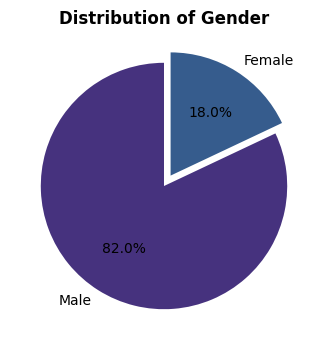

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(gender_counts,explode=[0,0.10],startangle = 90,labels= gender_counts.index, autopct = '%1.1f%%',colors = sns.color_palette("viridis"))
plt.title('Distribution of Gender',fontweight='bold')
plt.show()

The pie chart here shows that 82% data is of males , whereas 18% is of females.

In [ ]:
country_count = df['Country'].value_counts()

In [ ]:
#Creating a dataframe from country_count series by using reset_index function:
country_count_df = country_count.reset_index()
country_count_df.columns = ['Country','Count']

In [ ]:
top10 = country_count_df.head(10)

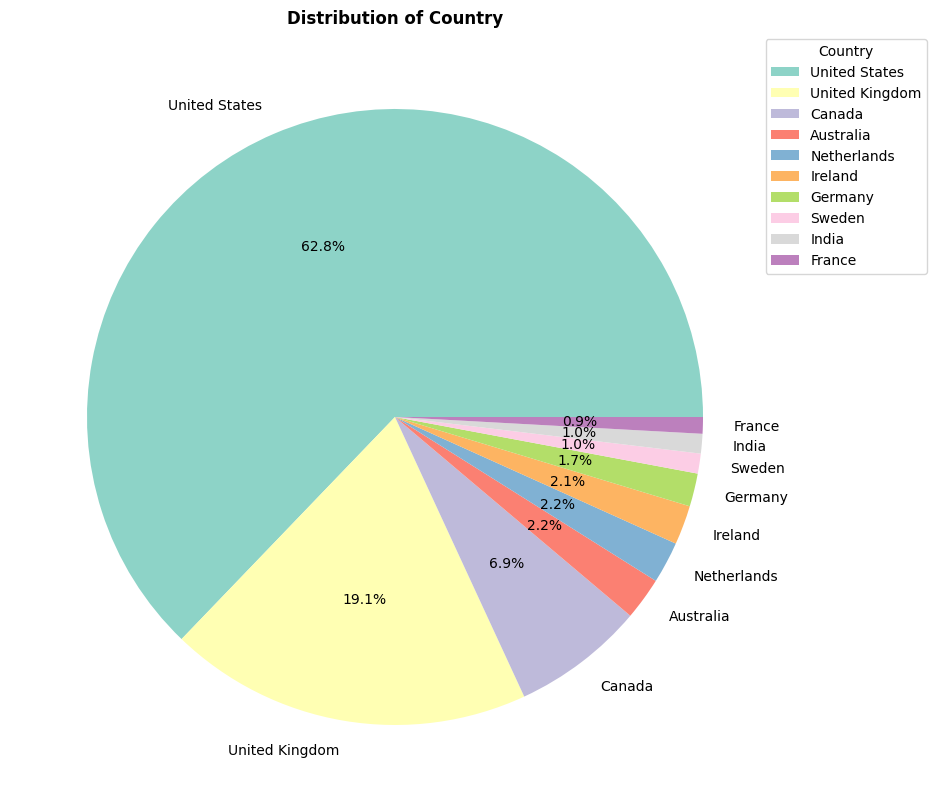

In [ ]:
# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top10['Count'],labels= top10['Country'] ,autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), title='Country')
plt.title("Distribution of Country", fontweight='bold')
plt.show()

CONCLUSION :
1.) United States is leading where most no. of residents have mental health issues.
2.) France, India, Sweden have least mental health related residents.

In [ ]:
occupation_counts = df['Occupation'].value_counts()

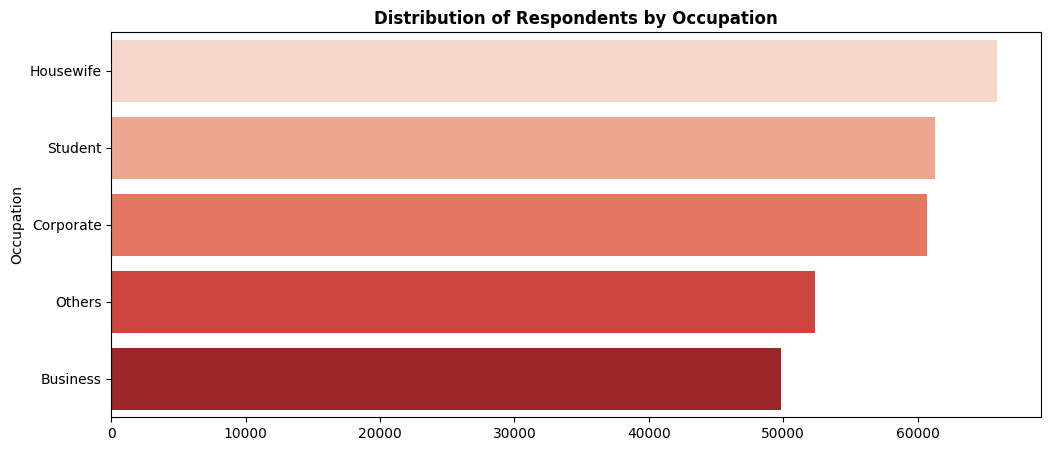

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x=occupation_counts.values,y=occupation_counts.index,palette='Reds')
plt.title('Distribution of Respondents by Occupation',fontweight='bold')
plt.show()

Amongst all the recorded occupations, 'housewives' has been in the worst mental state, followed by 'Student' and 'Corporate' with some minor difference. The least recorder data of mental health issues was of 'Business' people.

4. Analysis of Mental Health History:

- Plot the distribution of 'Mental Health History' responses and analyze the proportions of each category.


In [ ]:
mental_health_counts = df['Mental_Health_History'].value_counts()


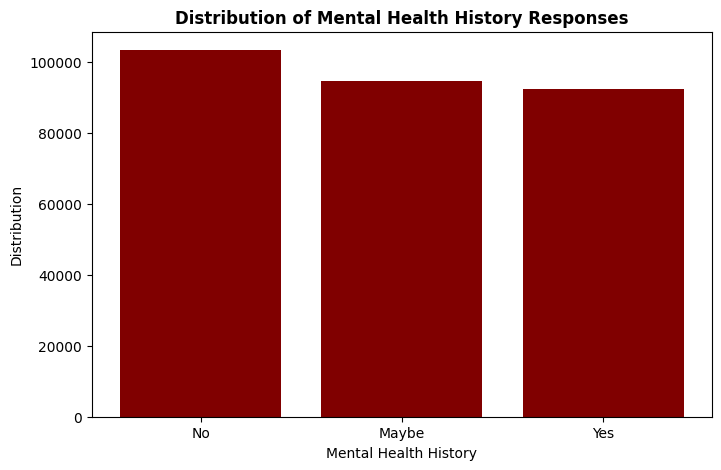

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(mental_health_counts.index, mental_health_counts.values, color ='maroon')
plt.title('Distribution of Mental Health History Responses', fontweight='bold')
plt.xlabel('Mental Health History')
plt.ylabel('Distribution')
plt.show()

Conclusion:

The bar chart here shows that people having a history of bad mental health are less as compared with people who does not have any mental health illness history, but they don't vary too much

5. Correlation Analysis:

- Investigate the relationship between 'Family History' and 'Treatment'
- Explore the correlation between 'Mood Swings' and 'Coping Struggles'.


In [ ]:
df['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Mood_Swings'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [ ]:
df['Coping_Struggles'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
encoded = df.copy()
encoded['family_history'] = encoded['family_history'].map({'No': 0, 'Yes': 1})
encoded['treatment'] = encoded['treatment'].map({'No': 0, 'Yes': 1})
encoded['Mood_Swings'] = encoded['Mood_Swings'].map({'Low': 0, 'Medium': 1, 'High': 2})
encoded['Coping_Struggles'] = encoded['Coping_Struggles'].map({'No': 0, 'Yes': 1})

In [ ]:
X = encoded[['family_history','treatment']].corr().iloc[0,1]
X

0.36473692231035376

The data of those who are having a family history of mental illness with those who are undergoing a treatment for mental illness is having a correlation of 0.36, means they are positively related with each other i.e; if someone is taking a treatment for some mental illness, it is possible that they are having a family history of it too, but since the correlation value is not so much, it shows that there are some other factors also

In [ ]:
Y = encoded[['Mood_Swings','Coping_Struggles']].corr().iloc[0,1]
Y

-0.010746818220212671

The correlation here is almost '0', showing that 'Mood Swings' is not related with 'Coping Struggles'.

6. Frequency of Days Indoors:

- Visualize the number of days respondents stayed indoors due to mental health issues using histograms or box plots.


In [ ]:
# Count the number of respondents in each category
category_counts = df['Days_Indoors'].value_counts()


In [ ]:

# Sort the counts in ascending order
sorted_counts = category_counts.sort_values()



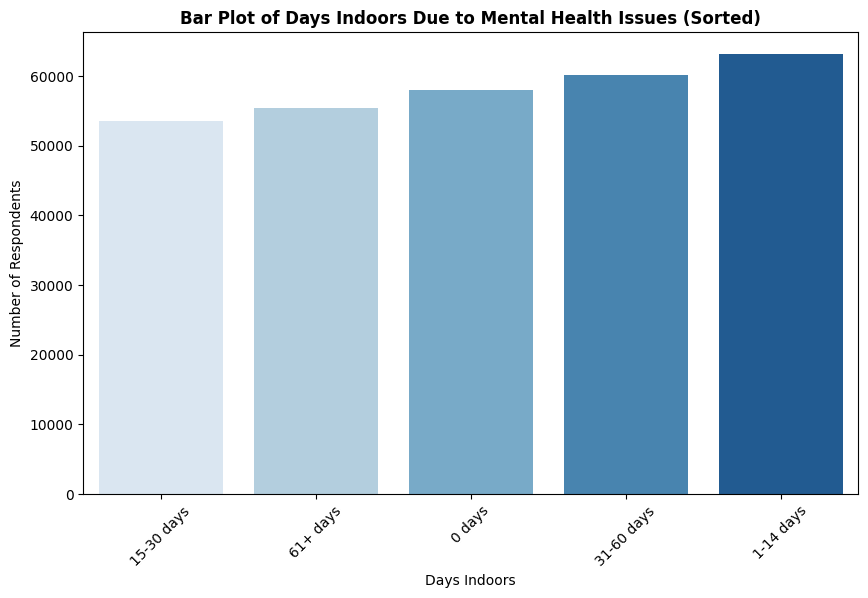

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='Blues')
plt.title('Bar Plot of Days Indoors Due to Mental Health Issues (Sorted)', fontweight='bold')
plt.xlabel('Days Indoors')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

Conclusion:

1.) The most common duration for staying indoors due to mental health issues is 1-14 days.

2.) The second and third highest frequencies are 31-60 days and 0 days.

3.)  The least reported durations are 61+ days and 15-30 days

**-The highest number of respondents stayed indoors for 1-14 days, suggesting that short-term mental health issues are common, significant number of respondents reported 0 days indoors, indicating that a portion of the population does not experience severe enough mental health issues to stay indoors & smaller yet significant numbers for 61+ days and 31-60 days show that while fewer in number, there are respondents who experience more severe and prolonged mental health issues, requiring extended periods indoors.**

7. Impact of Social Factors:

- Analyze the effects of 'Social Weakness' on 'Work Interest' and 'Coping Struggles' using cross-tabulations

In [ ]:
# Cross Tabulation Between 'Social Weakness' and "Work Interest"
cross_tabulation_analysis_1 = pd.crosstab(df['Social_Weakness'], df['Work_Interest'])
cross_tabulation_analysis_1

Work_Interest,Maybe,No,Yes
Social_Weakness,,,
Maybe,34473,35330,32774
No,34110,33137,29230
Yes,31801,36545,22651


Conclusion:

1.) Among those with social weakness (Yes in Social Weakness), the largest group (36,545) reports no work interest. Those who feel socially weak are more likely to lack interest in their work.

2.) For respondents in the Maybe Social Weakness category, the distribution across work interest categories is relatively even. This suggests that for those unsure about their social weakness, their work interest levels are not strongly skewed in any direction.

3.) In general, the group that reports Yes for Social Weakness shows lower numbers in the Yes Work Interest category (22,651). This reinforces the potential negative impact of social weakness on work interest.

**Focus Areas: For organizations, this analysis highlights the need to support employees who may feel socially weak, as this could help increase their work interest and, potentially, their overall productivity and job satisfaction.**

In [ ]:
# Cross Tabulation Between 'Social Weakness' and "Coping Struggles"
cross_tabulation_analysis_2 = pd.crosstab(df['Social_Weakness'], df['Coping_Struggles'])
cross_tabulation_analysis_2

Coping_Struggles,No,Yes
Social_Weakness,,
Maybe,56040,46537
No,50444,46033
Yes,46547,44450


Conclusion:

1.) There are 56,040 respondents who might have social weakness but do not struggle with coping.

2.) Respondents with a definite social weakness (Yes) have a relatively high number of coping struggles (44,450). This indicates a strong relationship between experiencing social weakness and facing difficulties in coping.

8. Coping Mechanisms:

- Chart the frequency and types of 'Coping Struggles' faced by respondents and compare across different stress levels

In [ ]:
# Count the frequency of each type of coping struggle
coping_struggles_counts = df['Coping_Struggles'].value_counts()

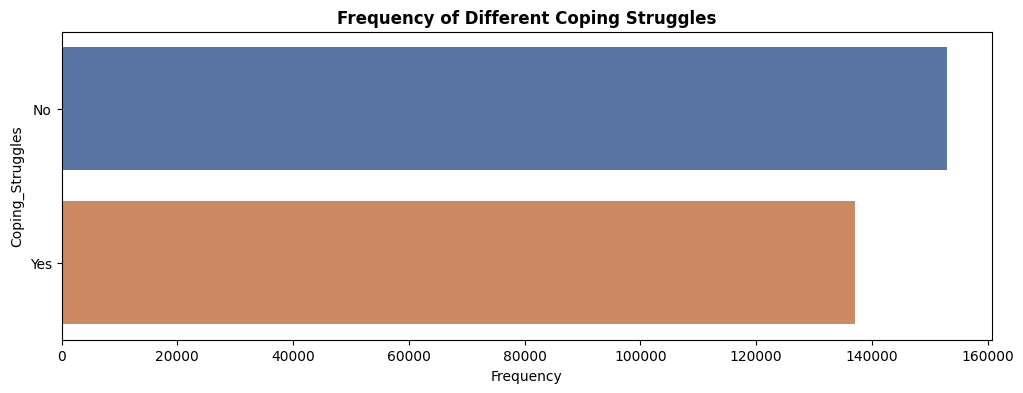

In [ ]:
#Plotting the bar chart
plt.figure(figsize=(12, 4))
sns.barplot(x=coping_struggles_counts.values, y=coping_struggles_counts.index, palette='deep')
plt.xlabel('Frequency')
plt.title('Frequency of Different Coping Struggles',fontweight='bold')
plt.show()

The chart here concludes that the frequency of those who are struggling with coping is less than those who are not.

In [ ]:
# Cross-tabulation of 'Coping Struggles' and 'Growing Stress'
coping_stress_crosstab = pd.crosstab(df['Coping_Struggles'], df['Growing_Stress'])

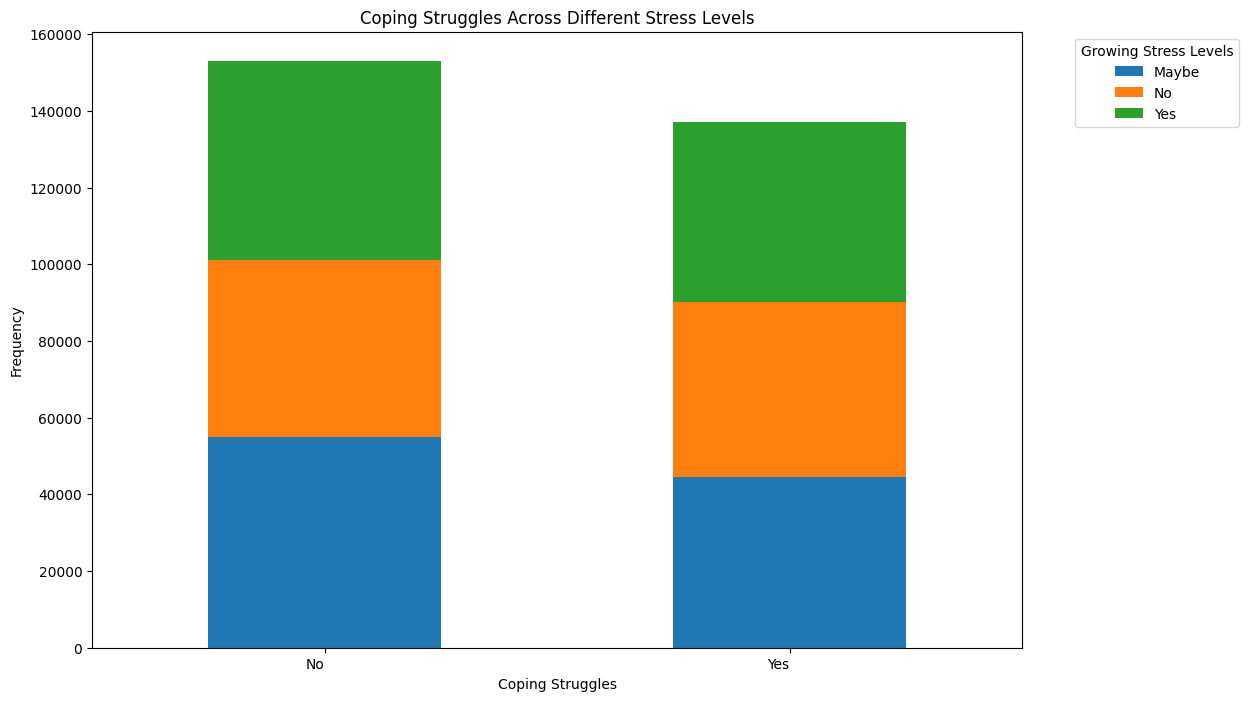

In [ ]:
# Plotting the stacked bar chart
coping_stress_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Coping Struggles Across Different Stress Levels')
plt.xlabel('Coping Struggles')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Growing Stress Levels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

9. Awareness and Availability of Care Options:

- Assess the awareness of care options among respondents and visualize the data using bar graphs or stacked charts

In [ ]:
Z = df['care_options'].value_counts(ascending=False)
Z

,count
care_options,
No,117614
Yes,94788
Not sure,77649


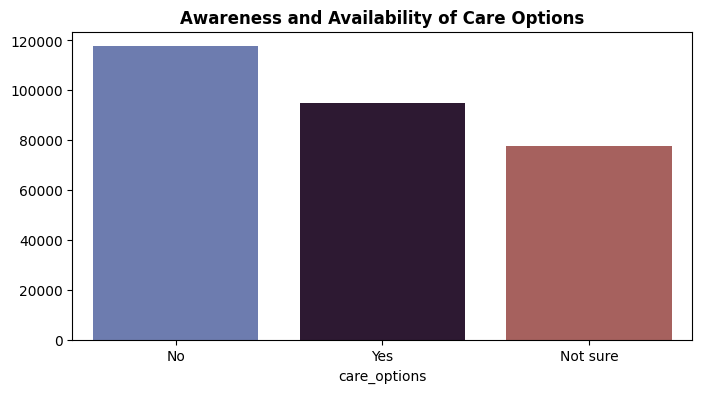

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=Z.index,y=Z.values,palette='twilight')
plt.title('Awareness and Availability of Care Options',fontweight='bold')
plt.show()

Conclusions:

1.) The highest number of respondents(117,614), reported not having access to mental health care options. This highlights a significant gap in mental health care availability.

2.) 94,788 respondents reported having access to mental health care options. While this is a substantial number, it still falls short of the number of respondents who lack access.

3.) 77,649 respondents were unsure about the availability of mental health care options. This indicates a level of uncertainty or lack of awareness about available resources.

In [ ]:
cross = pd.crosstab(df['Country'],df['care_options'])
cross

care_options,No,Not sure,Yes
Country,,,
Australia,1601,1991,2422
Belgium,390,431,0
Bosnia and Herzegovina,0,390,0
Brazil,1560,0,780
Canada,5070,6794,6835
Colombia,390,0,0
Costa Rica,0,0,390
Croatia,390,0,0
Czech Republic,0,0,390


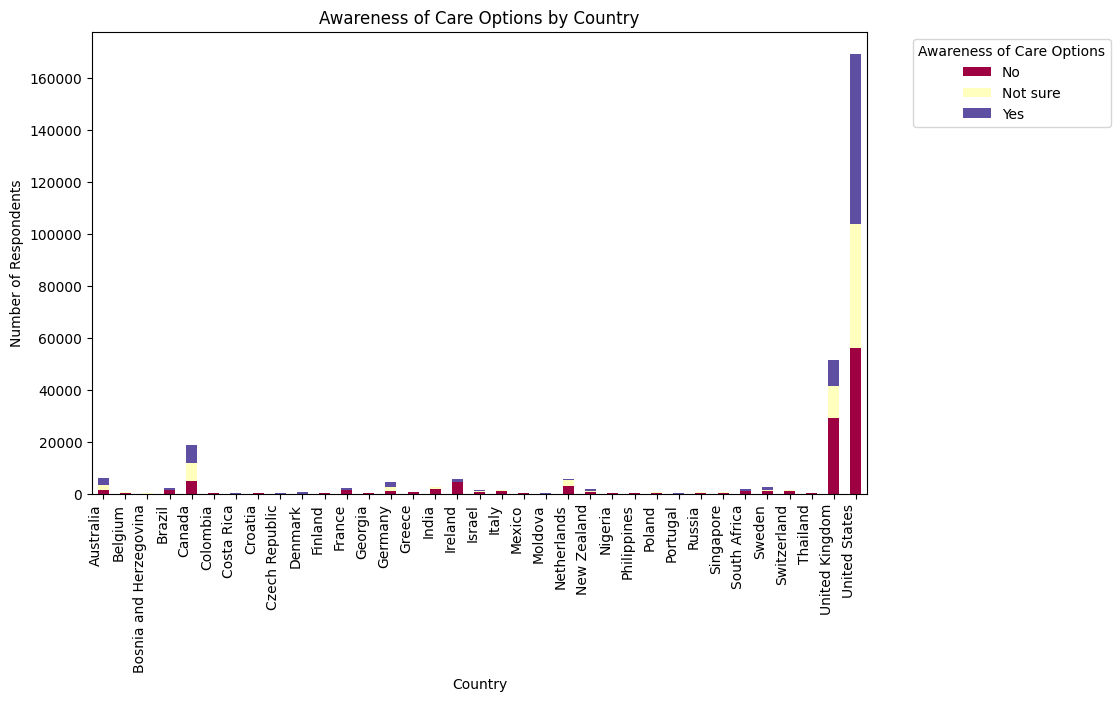

In [ ]:
cross.plot(kind='bar',stacked=True,figsize=(10,6), colormap='Spectral')
plt.title('Awareness of Care Options by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90,ha='right')
plt.legend(title='Awareness of Care Options',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

It is quite obvious the U.S. has the most amount of availability and awareness of care options as U.S. is having most no. of mental health respondants.

It is followed by U.K., which is still less than half of U.S..